In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Lettura dei dati

In [34]:
# ["chb01_03", "chb01_04", "chb01_15", "chb01_16", "chb01_18", "chb01_21", "chb01_26"]
patient_id = "chb01"
record_id = "03"

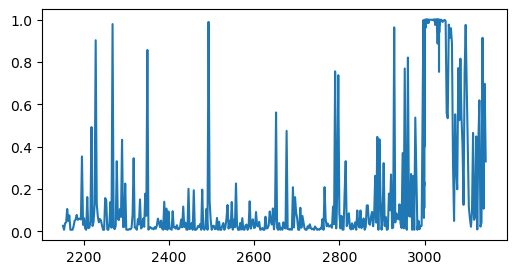

In [35]:
time = np.load(f"output\probs\\time_{patient_id}_{record_id}.npy").ravel()
x = np.load(f"output\probs\prob_{patient_id}_{record_id}.npy").ravel()

plt.figure(figsize=(6,3))
plt.plot(time,x)
plt.show()

Spazio delle fasi - x(t) vs x(t+L)

In [36]:
# # Spazio delle fasi (posizione, posizione laggata)
# def embed_ts(x, m, tau):
#     N = len(x)
#     return np.array([x[i:i+m*tau:tau] for i in range(N - (m-1)*tau)])

# # Iperparametri
# m = 2
# tau = 10

# embedded = embed_ts(x, m, tau)

# plt.figure(figsize=(5,5))
# plt.plot(embedded[:,0], embedded[:,1], '.', alpha=0.5)
# plt.xlabel('x(t)')
# plt.ylabel(f'x(t-{tau})')
# plt.title('Spazio delle fasi - v(t) vs v(t+L)')
# plt.show()

Spazio delle fasi - v(t) vs a(t)

In [37]:
# v = np.diff(x) / np.diff(time)
# time_v = (time[:-1] + time[1:]) / 2

# a = np.diff(v) / np.diff(time_v)
# time_a = (time_v[:-1] + time_v[1:]) / 2

# # Plot accelerazione vs velocità
# plt.figure(figsize=(6,3))
# plt.plot(v[:-1], a, '.', markersize='3')
# plt.xlabel('Velocità')
# plt.ylabel('Accelerazione')
# plt.show()

Spazio delle fasi - x(t) vs v(t) (velocità al lag 1)

In [38]:
# dt = np.diff(time)       # dt passo temporale
# v = np.diff(x) / dt      # derivata numerica, 
# v = np.append(v, v[-1])  # per mantenere stessa lunghezza di x

# plt.figure(figsize=(5,5))
# plt.plot(x, v, '.', alpha=0.5)
# plt.xlabel('Posizione x(t)')
# plt.ylabel('Velocità v(t)')
# plt.title('Spazio delle fasi: posizione vs velocità')
# plt.show()

Stessa cosa ma considera anche lo spostamento nei tempi intermedi

In [39]:
# L = 5  # lag
# dt_vec = np.diff(time)

# v_intermediate = []
# colors = []

# for i in range(len(x) - L):
#     segment = x[i:i+L+1]
#     delta_x_sum = np.sum(np.abs(np.diff(segment)))
#     dt_sum = np.sum(dt_vec[i:i+L])
#     v_intermediate.append(delta_x_sum / dt_sum)

#     if np.all(segment <= 0.5):
#         colors.append('green')
#     elif np.all(segment > 0.5):
#         colors.append('red')
#     else:
#         colors.append('orange')

# v_intermediate = np.array(v_intermediate)
# x_values = x[:-L]
# colors = np.array(colors)

# fig = plt.figure(figsize=(10, 3))
# gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])
# ax_phase = fig.add_subplot(gs[0])
# ax_time = fig.add_subplot(gs[1])

# # Spazio delle fasi
# ax_phase.set_xlabel('x(t)')
# ax_phase.set_ylabel(f'v(t) con lag {L}')
# ax_phase.set_title('Spazio delle fasi')

# margin_x = (x_values.max() - x_values.min()) * 0.05
# margin_v = (v_intermediate.max() - v_intermediate.min()) * 0.05
# ax_phase.set_xlim(x_values.min() - margin_x, x_values.max() + margin_x)
# ax_phase.set_ylim(v_intermediate.min() - margin_v, v_intermediate.max() + margin_v)

# scat_green = ax_phase.scatter([], [], color='green', s=10, alpha=0.6)
# scat_red = ax_phase.scatter([], [], color='red', s=10, alpha=0.6)
# scat_orange = ax_phase.scatter([], [], color='orange', s=10, alpha=0.6)

# # Serie temporale
# ax_time.plot(time, x)
# point_time = ax_time.plot([], [], 'o', color='black')[0]
# ax_time.set_xlabel('t')
# ax_time.set_ylabel('x(t)')
# ax_time.set_title('Serie temporale')

# # Indici per maschere
# idx_green = np.where(colors == 'green')[0]
# idx_red = np.where(colors == 'red')[0]
# idx_orange = np.where(colors == 'orange')[0]

# def update(frame):
#     green_mask = idx_green <= frame
#     red_mask = idx_red <= frame
#     orange_mask = idx_orange <= frame

#     # Update spazio delle fasi
#     scat_green.set_offsets(np.column_stack((x_values[idx_green[green_mask]], v_intermediate[idx_green[green_mask]])))
#     scat_red.set_offsets(np.column_stack((x_values[idx_red[red_mask]], v_intermediate[idx_red[red_mask]])))
#     scat_orange.set_offsets(np.column_stack((x_values[idx_orange[orange_mask]], v_intermediate[idx_orange[orange_mask]])))

#     # Update punto mobile nella serie temporale
#     current_t = time[frame]
#     current_x = x[frame]
#     point_time.set_data([current_t], [current_x])

#     return scat_green, scat_red, scat_orange, point_time

# max_frame = len(x_values) - 1
# anim = FuncAnimation(fig, update, frames=max_frame, interval=50, blit=True)

# HTML(anim.to_jshtml())

In [40]:
L = 10  # lag
dt_vec = np.diff(time)

time_scaling = np.sum(dt_vec[:L])

v_intermediate = []
colors = []

for i in range(len(x) - L):
    segment = x[i:i+L+1]
    delta_x_sum = np.sum(np.abs(np.diff(segment)))
    dt_sum = np.sum(dt_vec[i:i+L]) / time_scaling * L
    v_intermediate.append((delta_x_sum / dt_sum))

    if np.all(segment <= 0.5):
        colors.append('green')
    elif np.all(segment > 0.5):
        colors.append('red')
    else:
        colors.append('orange')

v_intermediate = np.array(v_intermediate)
x_values = x[:-L]
colors = np.array(colors)

KeyboardInterrupt: 

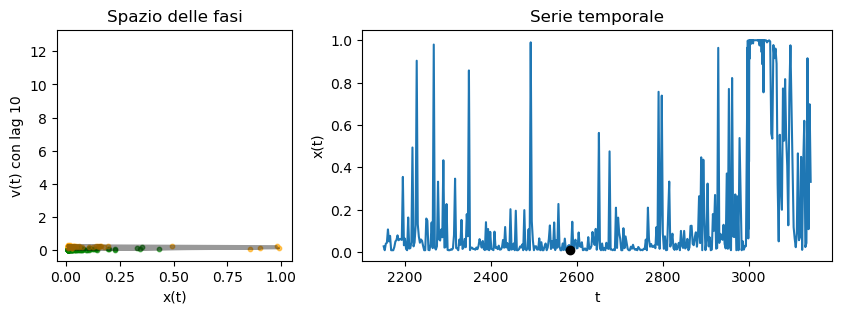

In [41]:
fig = plt.figure(figsize=(10, 3))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])
ax_phase = fig.add_subplot(gs[0])
ax_time = fig.add_subplot(gs[1])

# Spazio delle fasi
ax_phase.set_xlabel(f'x(t)')
ax_phase.set_ylabel(f'v(t) con lag {L}')
ax_phase.set_title('Spazio delle fasi')

margin_x = (x_values.max() - x_values.min()) * 0.05
margin_v = (v_intermediate.max() - v_intermediate.min()) * 0.05
ax_phase.set_xlim(x_values.min() - margin_x, x_values.max() + margin_x)
ax_phase.set_ylim(v_intermediate.min() - margin_v, v_intermediate.max() + margin_v)

scat_green = ax_phase.scatter([], [], color='green', s=10, alpha=0.6)
scat_red = ax_phase.scatter([], [], color='red', s=10, alpha=0.6)
scat_orange = ax_phase.scatter([], [], color='orange', s=10, alpha=0.6)

# Linea che collega i punti consecutivi (inizialmente vuota)
line_phase, = ax_phase.plot([], [], color='black', alpha=0.4)

# Serie temporale
ax_time.plot(time, x)
point_time = ax_time.plot([], [], 'o', color='black')[0]
ax_time.set_xlabel('t')
ax_time.set_ylabel('x(t)')
ax_time.set_title('Serie temporale')

# Indici per maschere
idx_green = np.where(colors == 'green')[0]
idx_red = np.where(colors == 'red')[0]
idx_orange = np.where(colors == 'orange')[0]

def update(frame):
    green_mask = idx_green <= frame
    red_mask = idx_red <= frame
    orange_mask = idx_orange <= frame

    # Aggiorna scatter
    scat_green.set_offsets(np.column_stack((x_values[idx_green[green_mask]], v_intermediate[idx_green[green_mask]])))
    scat_red.set_offsets(np.column_stack((x_values[idx_red[red_mask]], v_intermediate[idx_red[red_mask]])))
    scat_orange.set_offsets(np.column_stack((x_values[idx_orange[orange_mask]], v_intermediate[idx_orange[orange_mask]])))

    # Aggiorna linea che collega i punti fino al frame corrente
    x_line = x_values[:frame+1]
    y_line = v_intermediate[:frame+1]
    line_phase.set_data(x_line, y_line)

    # Aggiorna punto mobile nella serie temporale
    current_t = time[frame]
    current_x = x[frame]
    point_time.set_data([current_t], [current_x])

    return scat_green, scat_red, scat_orange, line_phase, point_time

max_frame = len(x_values) - 1
anim = FuncAnimation(fig, update, frames=max_frame, interval=50, blit=True)

HTML(anim.to_jshtml())

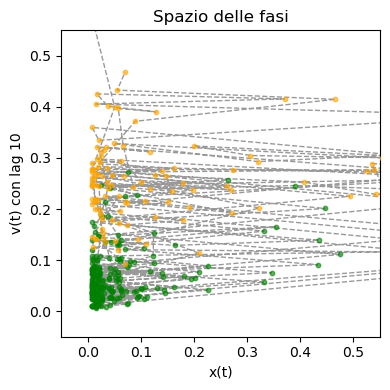

In [42]:
fig = plt.figure(figsize=(4,4))
ax_phase = fig.add_subplot(1, 1, 1)  # Aggiunto asse singolo

# Spazio delle fasi
ax_phase.set_xlabel(f'x(t)')
ax_phase.set_ylabel(f'v(t) con lag {L}')
ax_phase.set_title('Spazio delle fasi')

margin_v = (v_intermediate.max() - v_intermediate.min()) * 0.05
ax_phase.set_xlim(-0.05, 0.55)
ax_phase.set_ylim(-0.05, 0.55)

# Disegna tutti i punti colorati
ax_phase.scatter(x_values[colors == 'green'], v_intermediate[colors == 'green'], color='green', s=10, alpha=0.6, zorder=5)
ax_phase.scatter(x_values[colors == 'red'], v_intermediate[colors == 'red'], color='red', s=10, alpha=0.6, zorder=5)
ax_phase.scatter(x_values[colors == 'orange'], v_intermediate[colors == 'orange'], color='orange', s=10, alpha=0.6, zorder=5)

# Linea che collega tutti i punti
ax_phase.plot(x_values, v_intermediate, color='black', alpha=0.4, linestyle='dashed', linewidth=1, zorder=1)

plt.tight_layout()
plt.show()

Punti più vicini

196


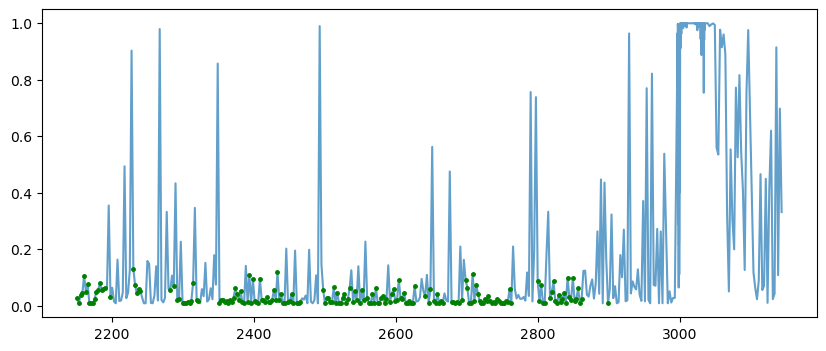

In [43]:
# Calcola la distanza euclidea dall'origine
distanze = np.sqrt(x_values**2 + v_intermediate**2)

# Calcola la soglia del percentile e trova i punti corrispondenti
soglia_25 = np.quantile(distanze, 0.25)
idx_25_percentile = np.where(distanze <= soglia_25)[0]
tempi_25_percentile = time[idx_25_percentile]
print(len(tempi_25_percentile))

plt.figure(figsize=(10, 4))
plt.plot(time, x, alpha=0.7)
plt.plot(tempi_25_percentile, x[idx_25_percentile], marker='.', color='green', linestyle='None', markersize=5)
plt.show()

Durata media di permanenza consecutiva in C: 6.98
Min durata: 0
Max durata: 26


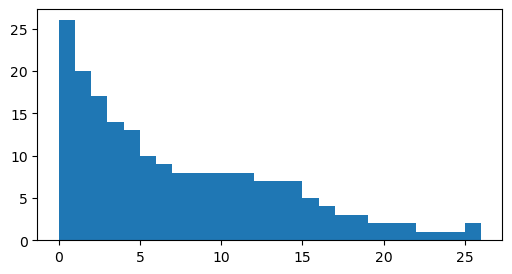

In [44]:
# Supponiamo idx_candidates = idx_25_percentile (ordinato)
idx_candidates = np.sort(idx_25_percentile)

# Per velocizzare la verifica, creiamo un set degli indici candidati
set_candidates = set(idx_candidates)

durate = []

for t in idx_candidates:
    tau = 0
    while (t + 1 + tau) in set_candidates:
        tau += 1
    durate.append(tau)

durate = np.array(durate)

# Ora puoi esaminare le durate: media, istogramma, ecc.
print(f"Durata media di permanenza consecutiva in C: {durate.mean():.2f}")
print(f"Min durata: {durate.min()}")
print(f"Max durata: {durate.max()}")
plt.figure(figsize=(6, 3))
plt.hist(durate,bins=durate.max())
plt.show()

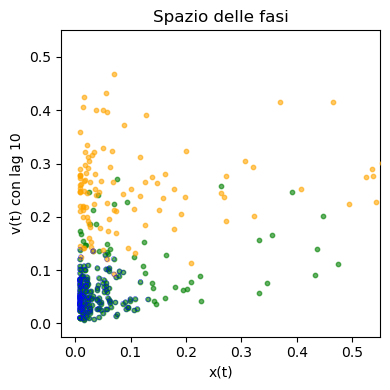

In [13]:
fig = plt.figure(figsize=(4,4))
ax_phase = fig.add_subplot(1, 1, 1)  # Asse singolo

# Spazio delle fasi
ax_phase.set_xlabel('x(t)')
ax_phase.set_ylabel(f'v(t) con lag {L}')
ax_phase.set_title('Spazio delle fasi')

margin_v = (v_intermediate.max() - v_intermediate.min()) * 0.05
ax_phase.set_xlim(-0.025, 0.55)
ax_phase.set_ylim(-0.025, 0.55)

# Disegna tutti i punti colorati
ax_phase.scatter(x_values[colors == 'green'], v_intermediate[colors == 'green'], color='green', s=10, alpha=0.6, zorder=5)
ax_phase.scatter(x_values[colors == 'red'], v_intermediate[colors == 'red'], color='red', s=10, alpha=0.6, zorder=5)
ax_phase.scatter(x_values[colors == 'orange'], v_intermediate[colors == 'orange'], color='orange', s=10, alpha=0.6, zorder=5)

# Aggiungi punti selezionati con marker più grande e bordo nero
ax_phase.scatter(
    x_values[idx_candidates],
    v_intermediate[idx_candidates],
    facecolors='none', edgecolors='blue', s=10, linewidth=0.25, zorder=1000
)

plt.tight_layout()
plt.show()


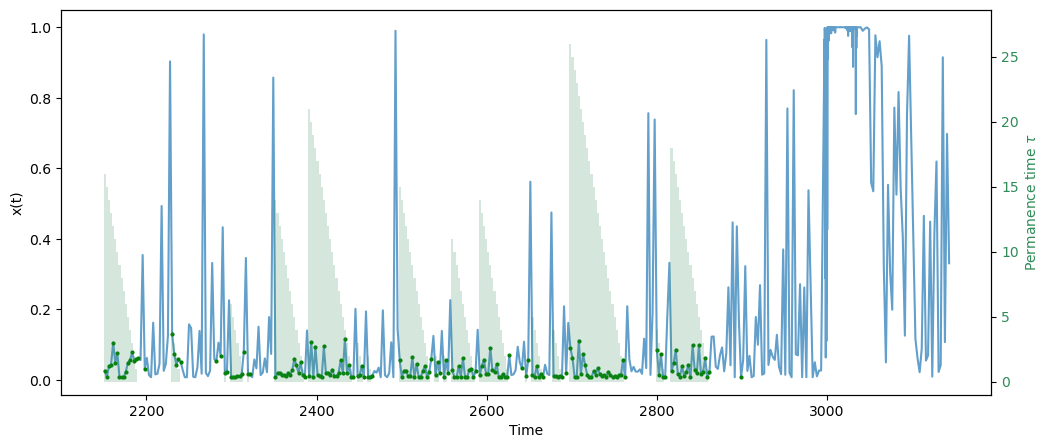

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()
dt = np.median(np.diff(time[idx_candidates])) # Calcolo larghezza delle barre per farle toccare
ax2.bar(time[idx_candidates], durate, width=dt, color='seagreen', alpha=0.2)
ax2.set_ylabel(r"Permanence time $\tau$", color='seagreen')
ax2.set_ylim(-1, durate.max() * 1.1)
ax2.tick_params(axis='y', labelcolor='seagreen')

ax1.plot(time, x, alpha=0.7, label='x(t)')
ax1.plot(time[idx_candidates], x[idx_candidates], '.', color='green', markersize=4)
ax1.set_xlabel("Time")
ax1.set_ylabel("x(t)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

plt.show()